In [33]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [34]:
data = pd.read_csv(r'C:/Users/yaman/OneDrive/Documents/Projects 2023/Data Mining/Data.csv')

In [35]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,12-14-2011,171.9,175.4,176.2,171.4,46.51K,2.50%
1,12-15-2011,168.9,171.6,172.0,167.1,70.29K,-1.75%
2,12-16-2011,165.4,168.4,168.4,163.5,52.03K,-2.07%
3,12-17-2011,165.8,166.0,166.0,165.0,1.68K,0.24%
4,12-19-2011,165.5,165.2,165.9,162.5,35.44K,-0.18%
...,...,...,...,...,...,...,...
2956,12-26-2022,434.1,430.0,437.0,422.2,3.45K,0.86%
2957,12-27-2022,429.1,436.5,439.7,421.0,7.06K,-1.15%
2958,12-28-2022,385.2,419.4,419.4,377.2,68.12K,-10.23%
2959,12-29-2022,375.9,391.2,401.7,372.0,70.06K,-2.41%


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2961 non-null   object 
 1   Price     2961 non-null   float64
 2   Open      2961 non-null   float64
 3   High      2961 non-null   float64
 4   Low       2961 non-null   float64
 5   Vol.      2930 non-null   object 
 6   Change %  2961 non-null   object 
dtypes: float64(4), object(3)
memory usage: 162.1+ KB


In [37]:
data.shape

(2961, 7)

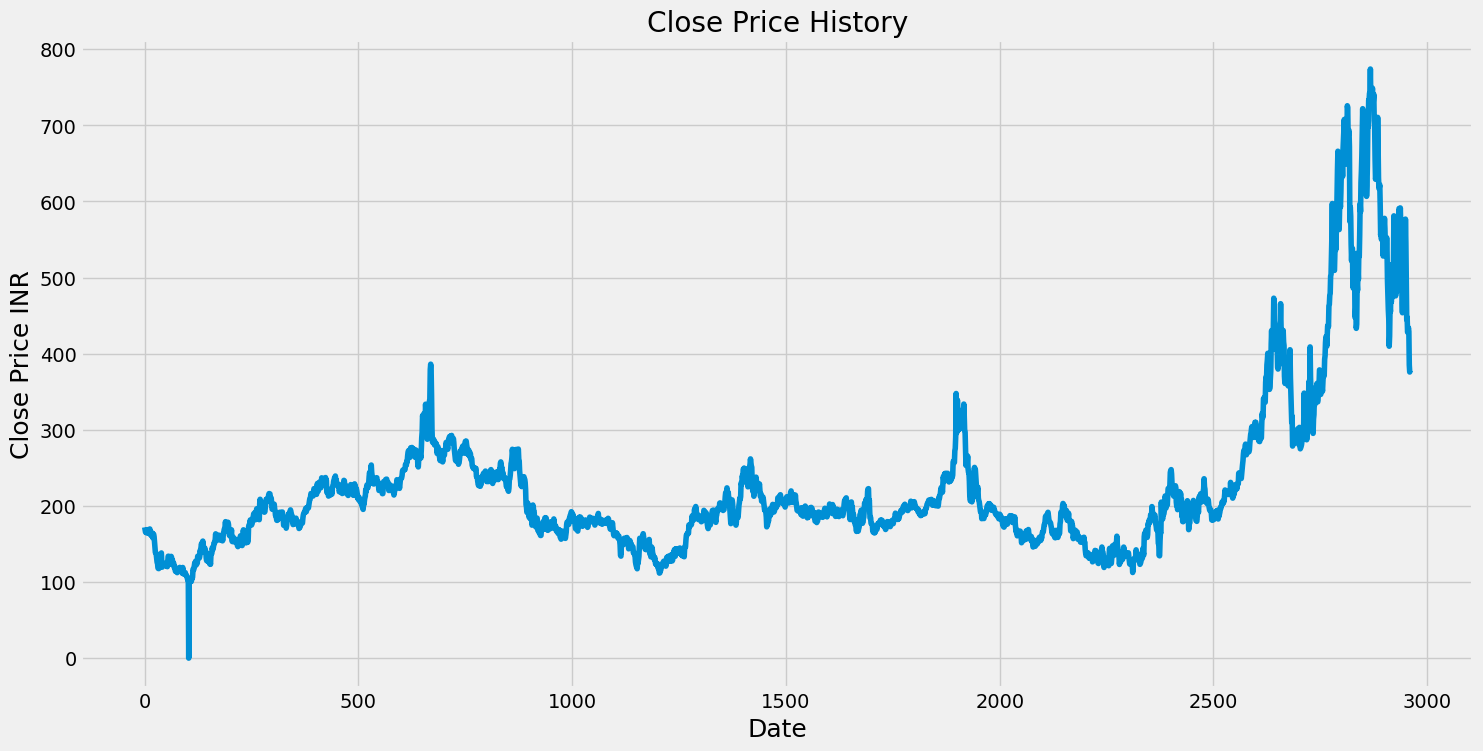

In [38]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Price'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [39]:
data=data.filter(['Price'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .7)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.22209302],
       [0.21821705],
       [0.21369509],
       ...,
       [0.49767442],
       [0.48565891],
       [0.4881137 ]])

In [40]:
#Create training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]

#########################################
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()


[array([0.22209302, 0.21821705, 0.21369509, 0.21421189, 0.21382429,
       0.2124031 , 0.21770026, 0.21434109, 0.21485788, 0.21395349,
       0.2129199 , 0.21124031, 0.21925065, 0.21136951, 0.20943152,
       0.20865633, 0.20878553, 0.20697674, 0.2124031 , 0.20426357,
       0.20981912, 0.21033592, 0.20620155, 0.19702842, 0.18591731,
       0.17919897, 0.17881137, 0.17635659, 0.16989664, 0.1627907 ,
       0.16162791, 0.15322997, 0.15206718, 0.15193798, 0.16085271,
       0.16640827, 0.17338501, 0.17428941, 0.17700258, 0.17855297,
       0.1620155 , 0.15439276, 0.16059432, 0.15736434, 0.15839793,
       0.16072351, 0.15775194, 0.15891473, 0.15891473, 0.16007752,
       0.15994832, 0.15607235, 0.1625323 , 0.15529716, 0.16382429,
       0.17299742, 0.17299742, 0.16666667, 0.16589147, 0.16563307])]
[0.165374677002584]



In [41]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(2013, 60)

In [42]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(2013, 60, 1)

In [43]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [45]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2013/2013 [==============================] - 84s 39ms/step - loss: 4.9549e-04


In [46]:
model.save('keras_model.h5')

In [47]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [48]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [49]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

28/28 [==============================] - 3s 28ms/step


In [50]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

24.644069999454253

In [51]:
mean_absolute_percentage_error(y_test, predictions)

0.0552566081223782

C:\Users\yaman\AppData\Local\Temp\ipykernel_6368\1347197902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


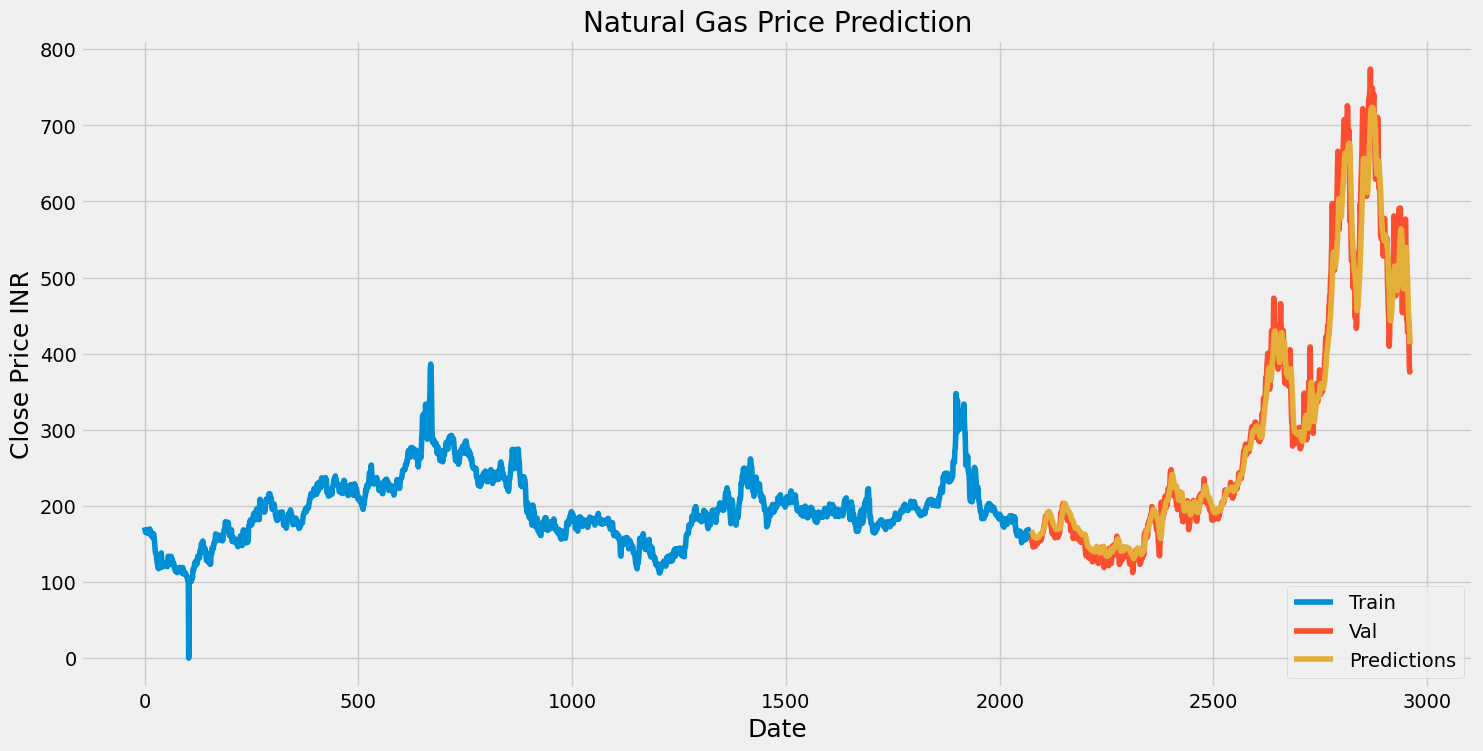

In [52]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Natural Gas Price Prediction')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [53]:
#show the valid and predicted prices
valid

,Price,Predictions
2073,159.2,167.567932
2074,159.8,166.678253
2075,153.6,166.332352
2076,154.6,165.384872
2077,150.8,164.476288
...,...,...
2956,434.1,456.629486
2957,429.1,445.535828
2958,385.2,437.718201
2959,375.9,425.544769
